# Getting Started

## Read CSV and Import


In [ ]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Helper Functions

In [ ]:

def create_X_y(df):
  y = None
  # map y values if they exist
  if 'y' in df:
    value_map = {
      'yes': 1,
      'no': 0
    }
    df['y_encoded'] = df['y'].map(value_map)
    y = df['y_encoded'].astype(bool)


  # data bins
  age_bins = [0, 20, 40, 60, 80]
  age_labels = ['young', 'middle-aged', 'old', 'very_old']
  campaign['age_bin'] = pd.cut(campaign['age'], age_bins, labels=age_labels )
  pdays_bins = [0, 3, 7, 998, 1000]
  pdays_labels = ['very_recent', 'recent', 'not_recent', 'not_contacted']
  campaign['pdays_bin'] = pd.cut(campaign['pdays'], pdays_bins, labels=pdays_labels )


  # # scale data

  # from sklearn.preprocessing import StandardScaler, MinMaxScaler
  # features_to_be_scaled = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
  # scaler = MinMaxScaler()

  # Set features for X and create dummies for the ones that need it
  X = df[['job','age_bin', 'loan', 'housing', 'day_of_week', 'pdays_bin', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

  X = pd.get_dummies(X, columns=['job', 'loan', 'housing', 'day_of_week', 'age_bin', 'pdays_bin'], drop_first=True)
  # X[features_to_be_scaled] = scaler.fit_transform(X[features_to_be_scaled])


  return X,y

# Model Training

## Data Prep for specific model

Create x,y

In [ ]:
X,y = create_X_y(campaign)
print(X.head())

AttributeError: 'ModuleSpec' object has no attribute 'create_X_y'

### Split the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)




# commented out print statments to remove clutter.  These just show info about the split
# print(X_train.head())
# print(X.info())
# print(y_train.head())

## Train the Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.8899379552198543

## Make predictions

In [ ]:
predictions = clf.predict(X_test)
print(predictions)



[False False False ... False False False]


## Results

### Results data

In [ ]:
# code obtained from google to quickly get count of each value from np array
import numpy as np

unique_values, counts = np.unique(predictions, return_counts=True)

value_counts = dict(zip(unique_values, counts))

print("Predictions value counts")
print(value_counts)
print("------------")
print("Should be:")
print(y_test.value_counts())


Predictions value counts
{np.False_: np.int64(10459), np.True_: np.int64(662)}
------------
Should be:
y_encoded
False    9891
True     1230
Name: count, dtype: int64


### Metrics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision: ",precision_score(y_test, predictions))
print("Recall", recall_score(y_test, predictions))
print("F1", f1_score(y_test, predictions))

Accuracy: 0.8899379552198543
Precision:  0.5045317220543807
Recall 0.27154471544715447
F1 0.35306553911205074


<Axes: >

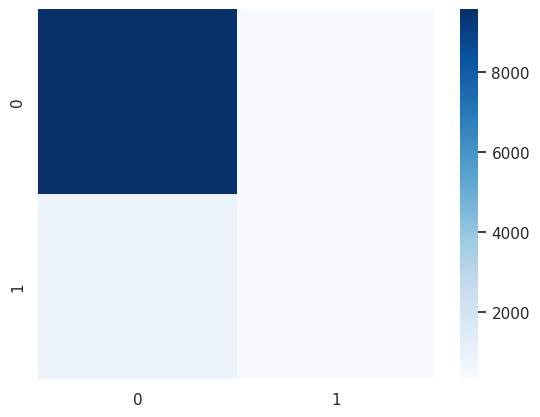

In [ ]:
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, cmap="Blues")

# Tune the model


## N_Neighbors -- F1

In [ ]:
# find best max_depth for best f1 score
best_f1_score = 0
best_n_neighbors = 0

for i in range(1, 25, 1):
  clf.set_params(n_neighbors=i)
  clf.fit(X_train, y_train)
  predictions = clf.predict(X_test)
  current_f1_score = f1_score(y_test, predictions)
  print(f"Current f1 score: {current_f1_score} with neighbors: {i}")
  if current_f1_score > best_f1_score:
    best_f1_score = current_f1_score
    best_n_neighbors = i


print("Best f1 score is: ", best_f1_score)
print("The neighbors used was: ", best_n_neighbors)




Current f1 score: 0.32160804020100503 with neighbors: 1
Current f1 score: 0.24344569288389514 with neighbors: 2
Current f1 score: 0.36253164556962025 with neighbors: 3
Current f1 score: 0.2767749699157641 with neighbors: 4
Current f1 score: 0.35306553911205074 with neighbors: 5
Current f1 score: 0.3000604960677556 with neighbors: 6
Current f1 score: 0.3653116531165312 with neighbors: 7
Current f1 score: 0.3077844311377245 with neighbors: 8
Current f1 score: 0.3462819089900111 with neighbors: 9
Current f1 score: 0.3086196503918023 with neighbors: 10
Current f1 score: 0.3572621035058431 with neighbors: 11
Current f1 score: 0.29450814725407365 with neighbors: 12
Current f1 score: 0.33919455473624505 with neighbors: 13
Current f1 score: 0.288 with neighbors: 14
Current f1 score: 0.3302540415704388 with neighbors: 15
Current f1 score: 0.2885085574572127 with neighbors: 16
Current f1 score: 0.3213038416763679 with neighbors: 17
Current f1 score: 0.29313543599257885 with neighbors: 18
Current

## p -- F1

In [ ]:
best_f1_score = 0
best_p = 0


for i in range(1, 3):
  clf.set_params(p=i, n_neighbors=best_n_neighbors)
  clf.fit(X_train, y_train)
  predictions = clf.predict(X_test)
  current_f1_score = f1_score(y_test, predictions)
  print(f"Current f1 score: {current_f1_score} with p: {i}")
  if current_f1_score > best_f1_score:
    best_f1_score = current_f1_score
    best_p = i

print("Best f1 score is: ", best_f1_score)
print("The p used was: ", best_p)

Current f1 score: 0.3638332430969139 with p: 1
Current f1 score: 0.3653116531165312 with p: 2
Best f1 score is:  0.3653116531165312
The p used was:  2


## weights -- F1




In [ ]:
best_f1_score = 0
best_weight = ""
weight_options = ['uniform', 'distance']


for i in weight_options:
  clf.set_params(p=best_p, n_neighbors=best_n_neighbors, weights=i)
  clf.fit(X_train, y_train)
  predictions = clf.predict(X_test)
  current_f1_score = f1_score(y_test, predictions)
  print(f"Current f1 score: {current_f1_score} with weight option: {i}")
  if current_f1_score > best_f1_score:
    best_f1_score = current_f1_score
    best_weight = i

print("Best f1 score is: ", best_f1_score)
print("The weight option used was: ", best_weight)

Current f1 score: 0.3653116531165312 with weight option: uniform
Current f1 score: 0.35366478728857 with weight option: distance
Best f1 score is:  0.3653116531165312
The weight option used was:  uniform


# Tuned Results

In [ ]:

clf.set_params(p=best_p, n_neighbors=best_n_neighbors, weights=best_weight)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)
print("X test shape", X_test.shape)
predictions = clf.predict(X_test)



# our own version of accuracy -- some google code to print the results and what really should be the results.
# look at the value counts for true and false
unique_values, counts = np.unique(predictions, return_counts=True)
value_counts = dict(zip(unique_values, counts))
print("Predictions value counts")
print(value_counts)
print("------------")
print("Should be:")
print(y_test.value_counts())


print("\n\n")
print("Accuracy:", accuracy_score(y_test, predictions))
print("Precision: ",precision_score(y_test, predictions))
print("Recall", recall_score(y_test, predictions))
print("F1", f1_score(y_test, predictions))

X test shape (11121, 30)
Predictions value counts
{np.False_: np.int64(10506), np.True_: np.int64(615)}
------------
Should be:
y_encoded
False    9891
True     1230
Name: count, dtype: int64



Accuracy: 0.8947037136948116
Precision:  0.5479674796747968
Recall 0.2739837398373984
F1 0.3653116531165312


<Axes: >

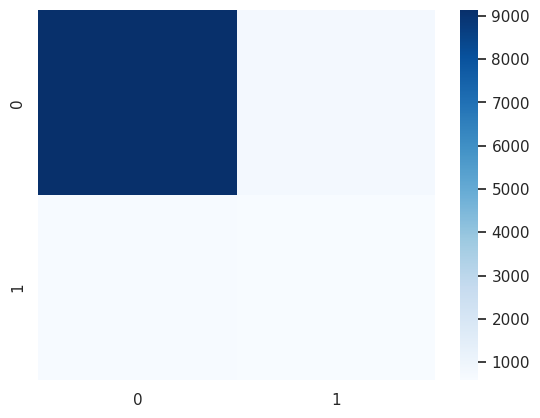

In [ ]:


conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, cmap="Blues")

In [ ]:
print(X.describe())
print(X.info())

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed
count  37069.000000    37069.000000   37069.000000  37069.000000  37069.000000
mean       0.725318        0.536068       0.431179      0.677385      0.769038
std        0.327560        0.225775       0.193678      0.393221      0.273325
min        0.000000        0.000000       0.000000      0.000000      0.000000
25%        0.333333        0.340608       0.338912      0.160961      0.512287
50%        0.937500        0.603274       0.376569      0.957379      0.859735
75%        1.000000        0.698753       0.602510      0.980957      1.000000
max        1.000000        1.000000       1.000000      1.000000      1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   emp.var.rate     37069 non-null  float64
 1   cons.price.idx   37069 non-null  floa

# Holdout data

In [ ]:
## holdout data
holdout_data = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv")
holdout_X, holdout_y = create_X_y(holdout_data)

holdout_X.info()

holdout_prediction = clf.predict(holdout_X)

print(holdout_prediction.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   emp.var.rate     4119 non-null   float64
 1   cons.price.idx   4119 non-null   float64
 2   cons.conf.idx    4119 non-null   float64
 3   euribor3m        4119 non-null   float64
 4   nr.employed      4119 non-null   float64
 5   loan_unknown     4119 non-null   bool   
 6   loan_yes         4119 non-null   bool   
 7   housing_unknown  4119 non-null   bool   
 8   housing_yes      4119 non-null   bool   
 9   day_of_week_mon  4119 non-null   bool   
 10  day_of_week_thu  4119 non-null   bool   
 11  day_of_week_tue  4119 non-null   bool   
 12  day_of_week_wed  4119 non-null   bool   
dtypes: bool(8), float64(5)
memory usage: 193.2 KB
(4119,)
